<a href="https://colab.research.google.com/github/bhoopesh-11/DL_Mini_Proj/blob/main/DL_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [28]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),   # NEW

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),   # NEW

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),    # NEW
    keras.layers.Dense(10, activation='softmax')
])


In [33]:
model.compile(optimizer= 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [43]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9231 - loss: 0.2014 - val_accuracy: 0.9223 - val_loss: 0.2277
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9227 - loss: 0.2066 - val_accuracy: 0.9173 - val_loss: 0.2333
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9220 - loss: 0.2059 - val_accuracy: 0.9203 - val_loss: 0.2255
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9224 - loss: 0.2021 - val_accuracy: 0.9213 - val_loss: 0.2271
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9262 - loss: 0.1992 - val_accuracy: 0.9210 - val_loss: 0.2299
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9226 - loss: 0.2021 - val_accuracy: 0.9178 - val_loss: 0.2463
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9205 - loss: 0.2049 - val_accuracy: 0.9218 - val_loss: 0.2223
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9238 - loss: 0.2019 - 

In [44]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9171 - loss: 0.2635
Test Accuracy: 0.916700005531311


In [64]:
# Step 1: Upload an image from your device
from google.colab import files
uploaded = files.upload()

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

uploaded_filename = next(iter(uploaded))
img = Image.open(uploaded_filename).convert('RGB')
img = img.resize((28, 28))
img_array = np.array(img) / 255.0
img_array = img_array.reshape(-1, 28, 28, 1)



class_names = ["T-shirt", "Dress", "Sandal", ...]

prediction = model.predict(img_array)
predicted_index = np.argmax(prediction)
predicted_label = class_names[predicted_index]
confidence = np.max(prediction) * 100

plt.imshow(img)
plt.title(f"Predicted: {predicted_label}\nConfidence: {confidence:.2f}%")
plt.axis('off')
plt.show()


Saving boots.webp to boots (1).webp
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


IndexError: list index out of range

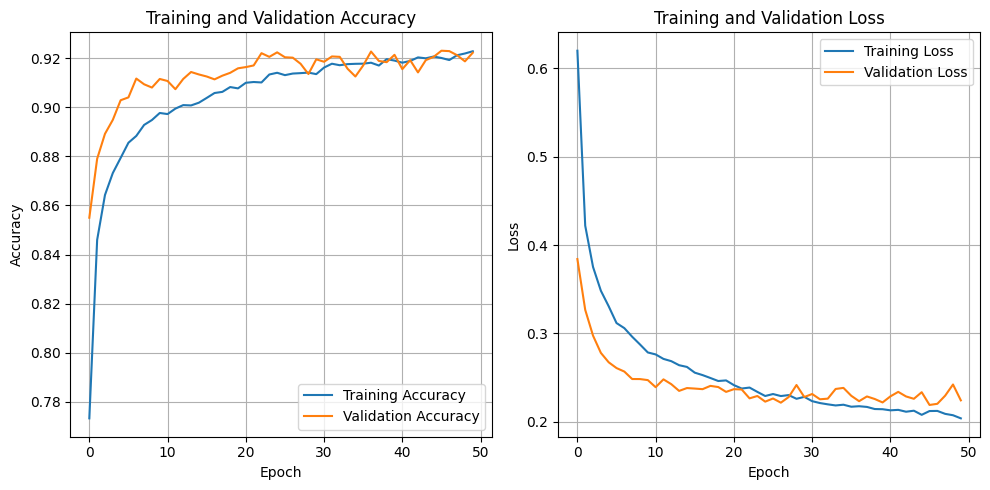

In [41]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()